In [ ]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection

In [ ]:
raw_dataset=pd.read_excel('/content/drive/My Drive/Colab Notebooks/pima-indians-diabetes.xlsx')
raw_dataset.columns=['Number', 'Plasma glucose concentration', 'Diastolic blood pressure (mm Hg)','Triceps skin fold thickness (mm)', '2-Hour serum insulin (mu U/ml)', 'Body mass index', 'Diabetes pedigree function',
'Age',  'Positive']

In [ ]:
raw_dataset[raw_dataset.columns].isna().sum()

Number                                0
Plasma glucose concentration          0
Diastolic blood pressure (mm Hg)      0
Triceps skin fold thickness (mm)      0
2-Hour serum insulin (mu U/ml)        0
Body mass index                       0
Diabetes pedigree function            0
Age                                   0
Positive                            323
dtype: int64

In [ ]:
raw_dataset=raw_dataset.dropna()
raw_dataset

,Number,Plasma glucose concentration,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index,Diabetes pedigree function,Age,Positive
0,1,85,66,29,0.0,26.6,0.351,31,0.0
1,8,183,64,0,0.0,23.3,0.672,32,1.0
2,1,89,66,23,94.0,28.1,0.167,21,0.0
3,0,137,40,35,168.0,43.1,2.288,33,1.0
4,5,116,74,0,0.0,25.6,0.201,30,0.0
...,...,...,...,...,...,...,...,...,...
439,0,189,104,25,0.0,34.3,0.435,41,1.0
440,2,83,66,23,50.0,32.2,0.497,22,0.0
441,4,117,64,27,120.0,33.2,0.230,24,0.0
442,8,108,70,0,0.0,30.5,0.955,33,1.0


In [ ]:
def Mean_Normalization(X): 
 for cols in X.columns:  X[cols] = (X[cols] - X[cols].mean())/X[cols].std()
 return X

In [ ]:
Y = raw_dataset.iloc[:,-1].values
#Check for biases in data
print('Positive class count',len(Y[Y == 1]))
print('Negative class count',len(Y[Y == 0]))

Positive class count 169
Negative class count 275


The dataset is biased towards the negative class. Balancing the dataset now

In [ ]:
XDS = raw_dataset[raw_dataset['Positive']==1]
DS = raw_dataset[raw_dataset['Positive']==0]
DS1 = DS.head(169)
DS2 = DS.tail(106)
XDS=XDS.append(DS1)
Y = XDS[XDS.columns[-1]]
XDS=XDS[XDS.columns[:-1]]
scaled = Mean_Normalization(XDS)
ones = np.ones(XDS.shape[0]).reshape(XDS.shape[0],1)
scaled.insert(0,'ones',ones)
X = scaled.iloc[:,:]
#Split data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X.values,Y.values,stratify=Y)

In [ ]:
# clean the index values
X_train=pd.DataFrame(X_train)
Y_train=pd.DataFrame(Y_train)
X_test=pd.DataFrame(X_test)
Y_test=pd.DataFrame(Y_test)

In [ ]:
def Logistic_Regression(X_train, Y_train, alpha=0.001, iter=100):
 theta = np.ones(X_train.shape[1])
 theta=theta.reshape(X_train.shape[1],1)
 Rl=[]
 m= X_train.shape[0]
 for iteration in range(iter):
  ht= (X_train.dot(theta))
  Yp =np.array(1/(1+np.exp(-ht)))
  Yp=Yp.reshape(Yp.shape[0],1)
  err= Yp- Y_train.values
  J= -(Y_train.values * np.log(Yp)) -((1-Y_train.values)*np.log(1-Yp))
  Rl.append(J.sum())
  theta= theta - ((alpha*(X_train.T.dot(err)))/m).values
 return theta, Rl, iter
params=Logistic_Regression(X_train, Y_train,2,25)

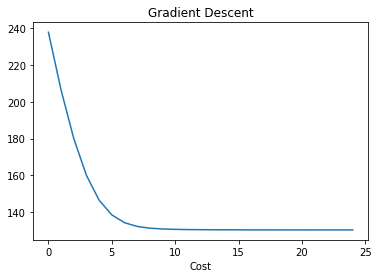

In [ ]:
plt.title('Gradient Descent')
plt.xlabel('Iterations')
plt.xlabel('Cost')
X= np.arange(params[2])
plt.plot(X,params[1])
plt.show()

In [ ]:
def predict(X=X_train):
 theta = params[0]
 
 ht= (X.dot(theta))
 Y =np.array(1/(1+np.exp(-ht)))
 return Y

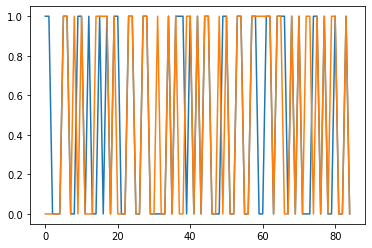

In [ ]:
# Predict using the model
X_t = X_test
Y_t = Y_test
Yp = predict(X_t)
#print(Yp)
# set threshold here
Yp[Yp>0.5] = 1
Yp[Yp<=0.5] = 0
X_terms = np.arange(X_t.shape[0])
plt.plot(X_terms, Yp)
plt.plot(X_terms, Y_t)
plt.show()

In [ ]:
Predictions = pd.DataFrame(Y_t)
Predictions.insert(1,1,Yp)
Predictions.columns=['Actual','Predicted']
# Metric calculations 
TP=Predictions[(Predictions['Actual'] == 1 ) & (Predictions['Predicted'] == 1)].count()[0]
TN=Predictions[(Predictions['Actual'] == 0) & (Predictions['Predicted'] == 0)].count()[0]
FP=Predictions[(Predictions['Actual'] == 0 ) & (Predictions['Predicted'] == 1)].count()[0]
FN=Predictions[(Predictions['Actual'] == 1 ) & (Predictions['Predicted'] == 0)].count()[0]
# Create the confusion Matrix 
confusion = pd.DataFrame(np.array([[TP, FP],[FN,TN]]))
confusion.columns = ['Actual_Positives','Actual_Negatives']
confusion.index = ['Predicted_Positives','Predicted_Negatives']
Predicted_Positive= TP + FP
Predicted_Negative= TN + FN
Actual_Positive= TP + FN
Actual_Negative= TN + FP
Accuracy= (TP + TN)/(Actual_Positive + Actual_Negative)
Precision= TP / Predicted_Positive
#Recall or Sensitivity
Recall = TP / Actual_Positive
Specificity = TN / Actual_Negative
F1_Score = (2*Precision * Recall) / (Precision + Recall)

In [ ]:
 a = np.array([[TP, FP],[FN,TN]])
print(confusion)

                     Actual_Positives  Actual_Negatives
Predicted_Positives                31                10
Predicted_Negatives                11                33


In [ ]:
 print('Accuracy: ',Accuracy)
print('Precision: ', Precision)
print('Recall: ',Recall)
print('Specificity: ', Specificity)
print('F1_score: %.2F'%F1_Score)

Accuracy:  0.7529411764705882
Precision:  0.7560975609756098
Recall:  0.7380952380952381
Specificity:  0.7674418604651163
F1_score: 0.75
